In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

RANDOM_SEED = 42

X, y = make_moons(n_samples=1000,
                  shuffle=True,
                  noise= 0.1,
                  random_state=RANDOM_SEED)

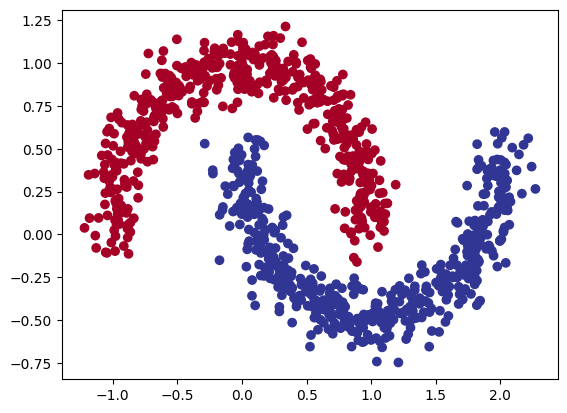

In [2]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [3]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
class MakeMoon(nn.Module):
    def __init__(self):
        super(MakeMoon, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [6]:
model = MakeMoon()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4300, -0.1308],
         [ 0.4985, -0.2608],
         [ 0.2450, -0.2692],
         [ 0.5502, -0.1866],
         [-0.5875,  0.4217],
         [-0.6208, -0.0345],
         [ 0.0892,  0.7038],
         [-0.3255,  0.3085],
         [-0.4024,  0.2700],
         [-0.3430,  0.5744],
         [ 0.4409, -0.3216],
         [ 0.4088, -0.1351],
         [ 0.4650,  0.7036],
         [ 0.6004,  0.1097],
         [-0.5278, -0.5285],
         [-0.6810, -0.1190],
         [-0.4029, -0.5585],
         [ 0.2834, -0.3963],
         [-0.6011,  0.3855],
         [ 0.3991,  0.1224],
         [-0.2410,  0.1017],
         [-0.5241, -0.4958],
         [-0.4041,  0.0175],
         [ 0.5360, -0.5693],
         [ 0.3955, -0.6230],
         [-0.6586, -0.6729],
         [-0.3255, -0.3747],
         [-0.2883, -0.2800],
         [ 0.0620, -0.5342],
         [ 0.1700, -0.2622],
         [ 0.3368,  0.6603],
         [-0.0377, -0.6359],
         [ 0.0384, -0.3944],
         [-0.1775,  

In [8]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().float()
    return (correct / len(y_true)) * 100

In [9]:
epochs = 100
for epoch in range(epochs):
    # Training
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to probabilities and round for binary labels
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f}, Train Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.6869, Train Acc: 53.75% | Test Loss: 0.6046, Test Acc: 84.00%
Epoch: 10 | Train Loss: 0.2532, Train Acc: 87.00% | Test Loss: 0.2470, Test Acc: 89.00%
Epoch: 20 | Train Loss: 0.1304, Train Acc: 94.50% | Test Loss: 0.1225, Test Acc: 94.50%
Epoch: 30 | Train Loss: 0.0468, Train Acc: 99.12% | Test Loss: 0.0511, Test Acc: 98.50%
Epoch: 40 | Train Loss: 0.0162, Train Acc: 99.88% | Test Loss: 0.0241, Test Acc: 99.50%
Epoch: 50 | Train Loss: 0.0069, Train Acc: 99.88% | Test Loss: 0.0146, Test Acc: 99.50%
Epoch: 60 | Train Loss: 0.0040, Train Acc: 100.00% | Test Loss: 0.0079, Test Acc: 99.50%
Epoch: 70 | Train Loss: 0.0029, Train Acc: 100.00% | Test Loss: 0.0087, Test Acc: 99.50%
Epoch: 80 | Train Loss: 0.0023, Train Acc: 100.00% | Test Loss: 0.0086, Test Acc: 99.50%
Epoch: 90 | Train Loss: 0.0019, Train Acc: 100.00% | Test Loss: 0.0089, Test Acc: 99.50%


In [10]:
def plot_decision_boundary(model, X, y):
    # Set the min and max values for the grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid so it can be passed as a batch to the model
    grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(torch.float32)

    # Pass the grid through the model and get predictions
    model.eval()  # Set the model to evaluation mode
    with torch.inference_mode():
        preds = model(grid).squeeze()
        preds = torch.round(torch.sigmoid(preds)).numpy()

    # Reshape the predictions to match the grid shape
    preds = preds.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')

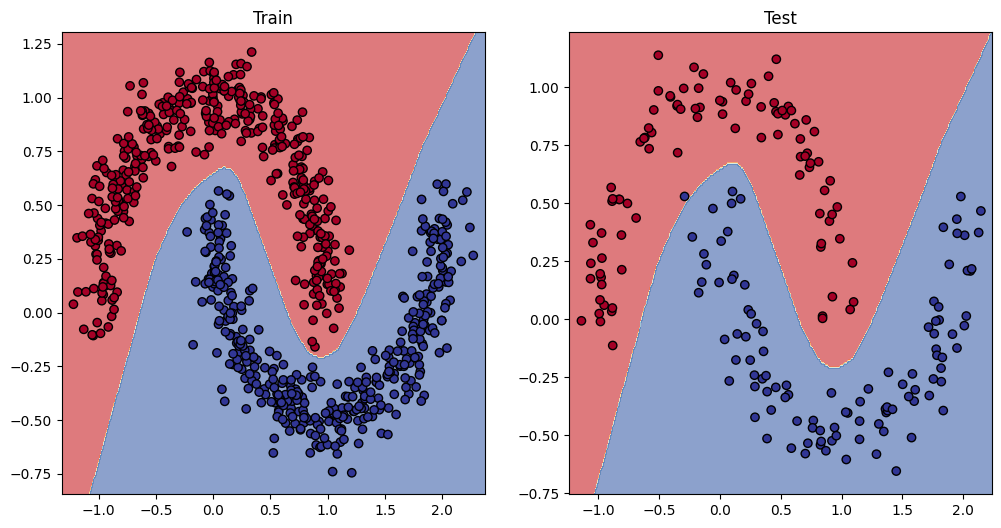

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plt.show()